✅ Dataset Loaded Successfully!
Shape: (45211, 17)
Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
✅ Preprocessing Done!
✅ Split completed. Training on 31647 samples.
✅ Decision Tree model trained.

🎯 Accuracy: 0.8901

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     11977
           1       0.57      0.24      0.34      1587

    accuracy                           0.89     13564
   macro avg       0.74      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



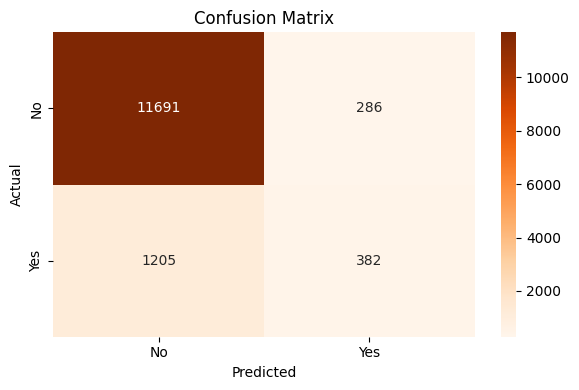

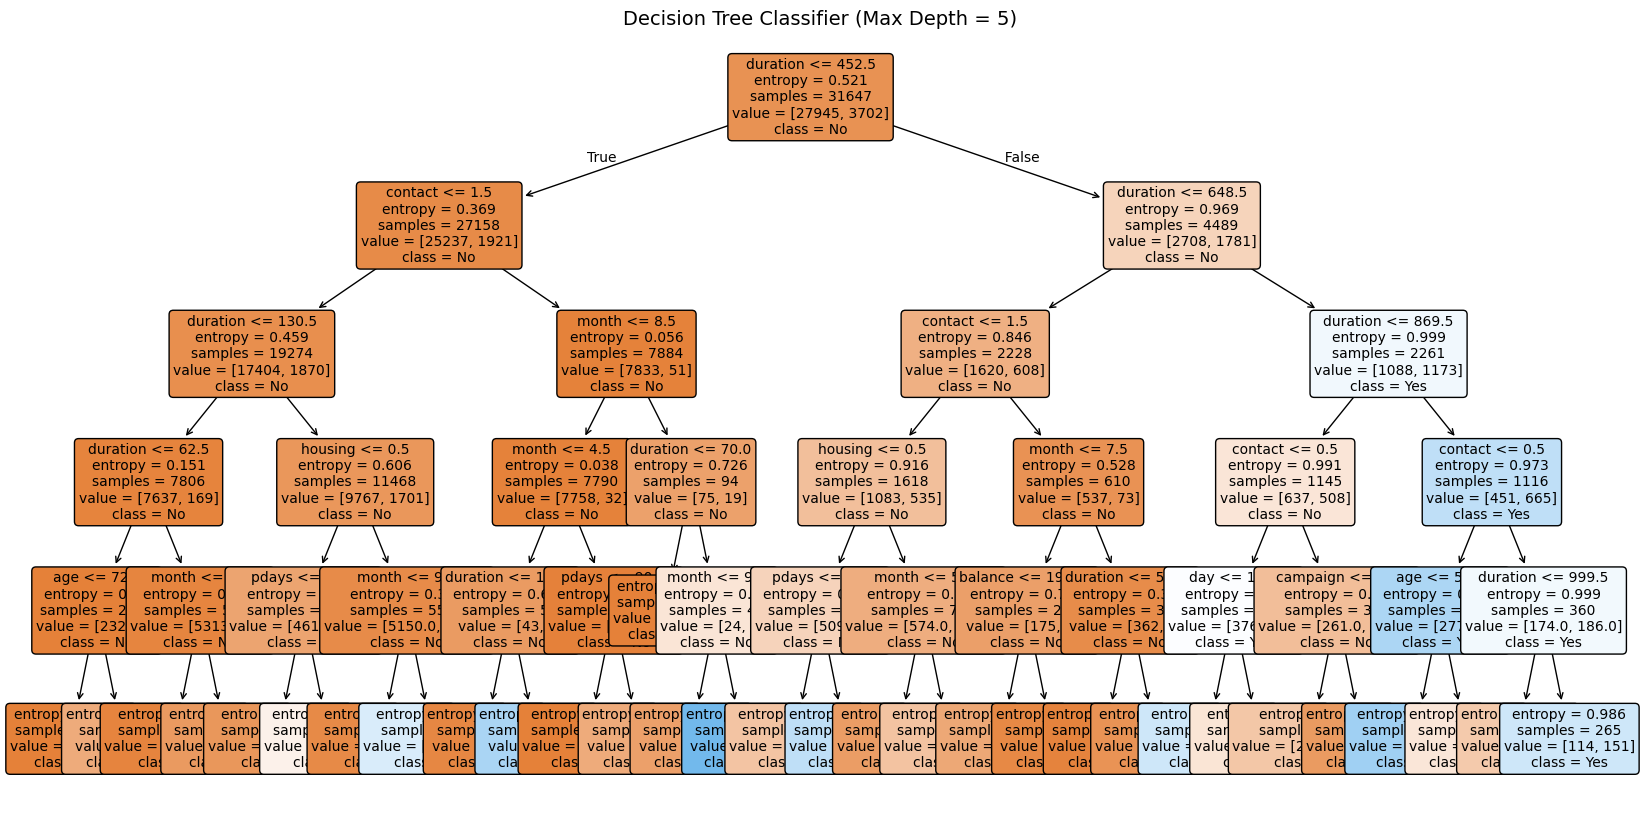

In [5]:
# -------------------- IMPORT LIBRARIES --------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# -------------------- STEP 1: LOAD DATA --------------------
df = pd.read_csv("bank-full.csv", sep=';')
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# -------------------- STEP 2: DATA PREPROCESSING --------------------
# Convert target variable to binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("✅ Preprocessing Done!")

# -------------------- STEP 3: TRAIN-TEST SPLIT --------------------
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("✅ Split completed. Training on", len(X_train), "samples.")

# -------------------- STEP 4: MODEL TRAINING --------------------
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

print("✅ Decision Tree model trained.")

# -------------------- STEP 5: EVALUATION --------------------
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\n🎯 Accuracy: {accuracy:.4f}")
print("\n📋 Classification Report:\n", report)

# -------------------- STEP 6: VISUALIZATION --------------------

# 🎯 Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig("confusion_matrix_output.png")
plt.show()

# 🌳 Decision Tree Visualization
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Classifier (Max Depth = 5)", fontsize=14)
plt.savefig("decision_tree_output.png")
plt.show()


In [4]:
from google.colab import files  # If using Google Colab

uploaded = files.upload()


Saving bank-full.csv to bank-full.csv
